In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('../dataset/incident_profile_95.csv')
df.columns.sort_values()

Index(['AGE_GROUP_15_26', 'AGE_GROUP_26_33', 'AGE_GROUP_33_43',
       'AGE_GROUP_43_55', 'AGE_GROUP_55_104', 'BEAT_OF_OCCURRENCE',
       'CRASH_MONTH', 'CRASH_YEAR', 'adverse_weather_crash_rate', 'avg_age',
       'avg_crash_severity_score', 'avg_lighting_severity',
       'avg_responsibility_score', 'avg_roadway_severity',
       'avg_weather_severity', 'combined_weather_road_severity',
       'damage_cost_LB', 'damage_high', 'damage_low', 'damage_medium',
       'damage_severity_avg', 'fatality_rate', 'injury_severity_score',
       'monthly_total_units', 'neo_patented_drivers', 'night_crash_rate',
       'num_towed_units_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers',
       'road_defect_crash_rate', 'senior_drivers', 'severe_injury_rate',
       'speeding_influence', 'sum_category_motorcycle',
       'sum_category_off-road/specialized', 'sum_category_passenger vehicle',
       'sum_category_public transport', 'sum_category_truck/commercial',
       'sum_damage_category_hig

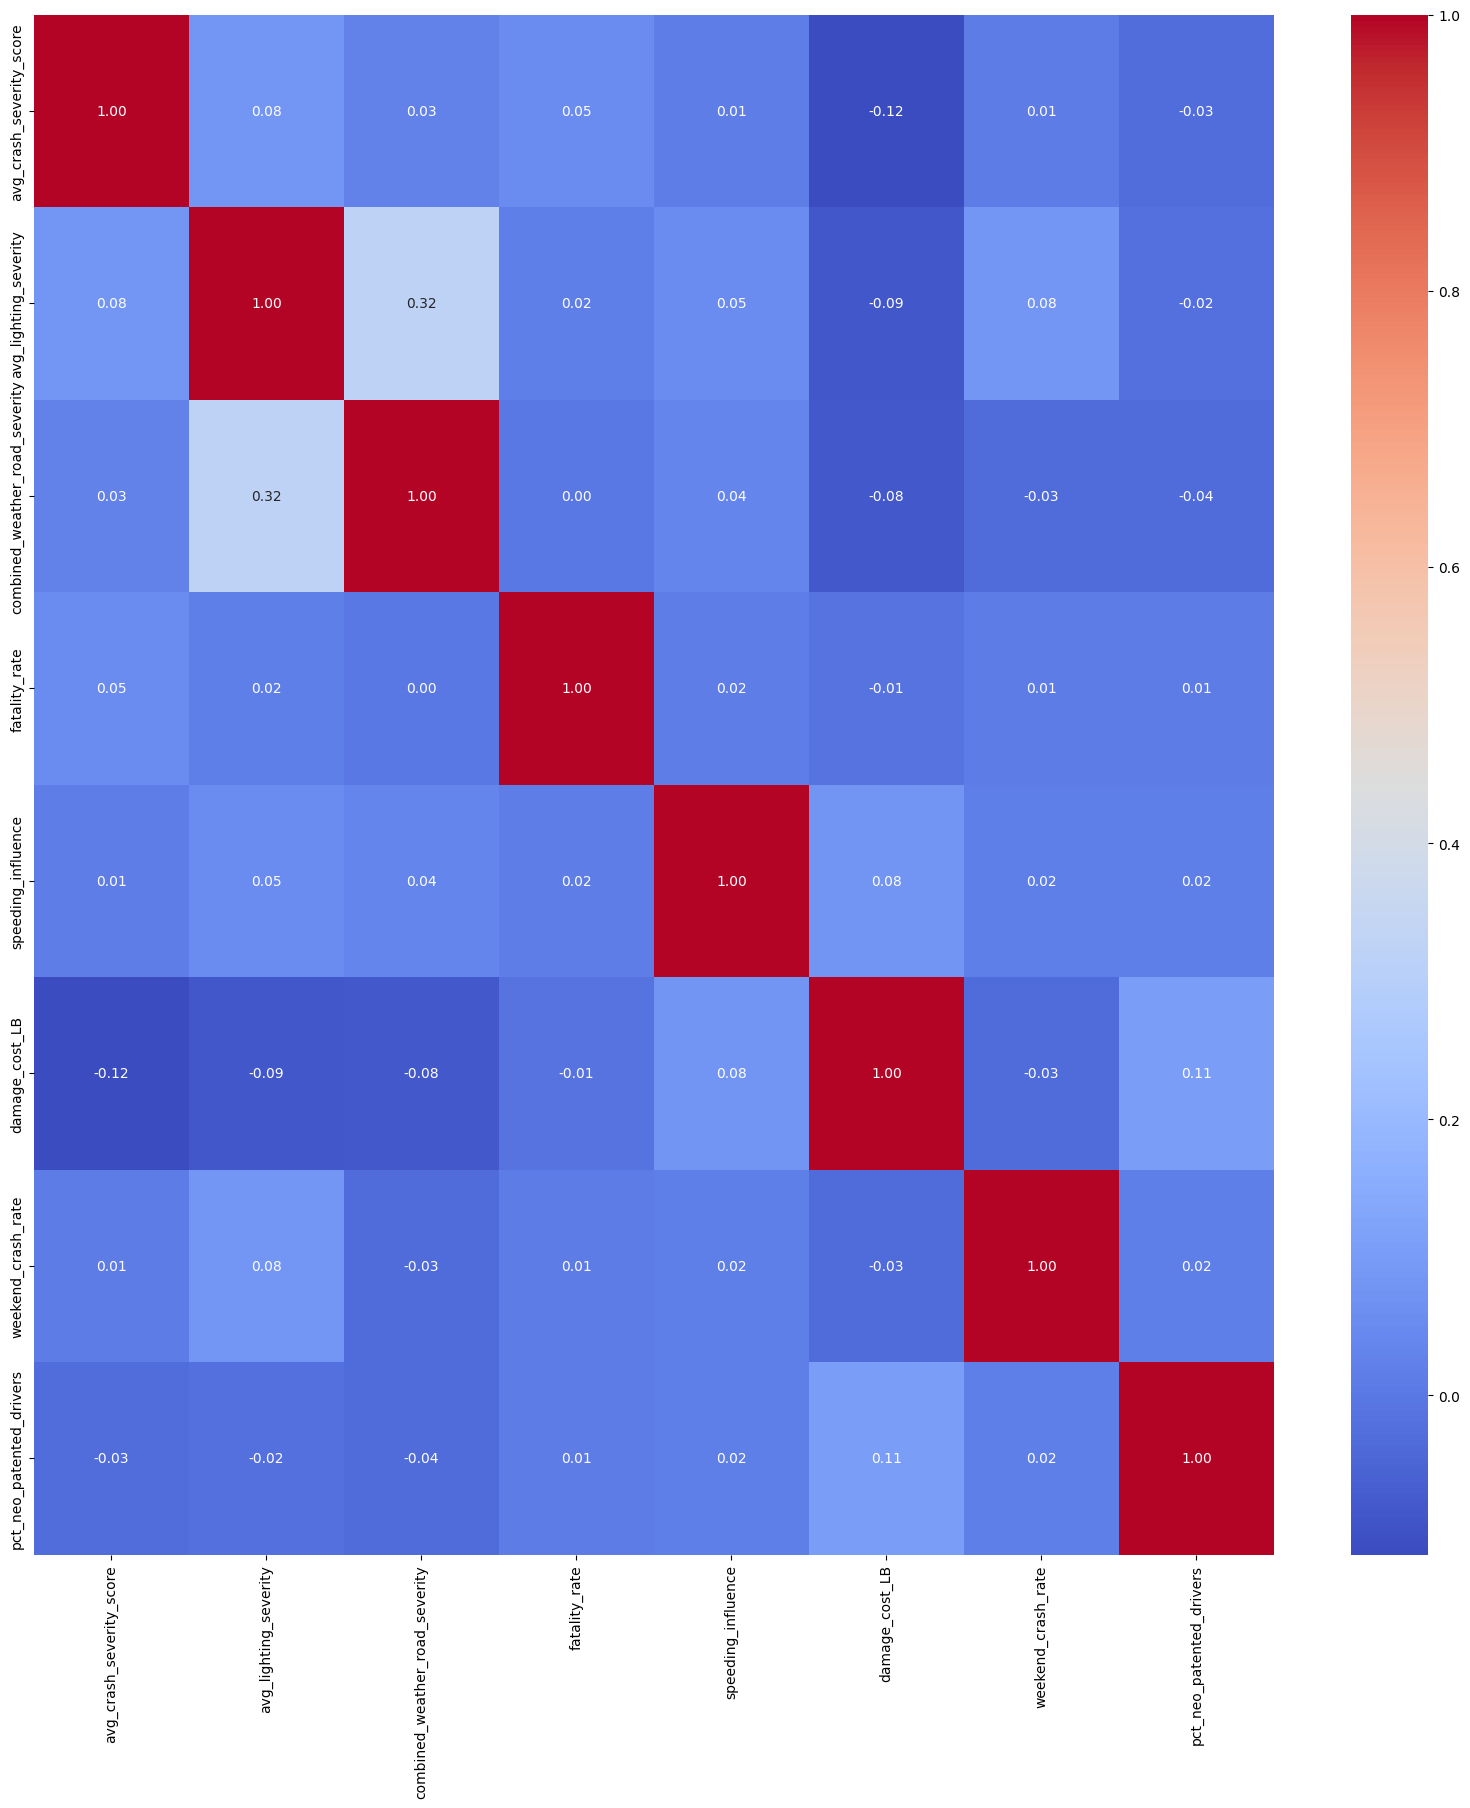

In [3]:
selected_features_OLD = ['avg_age', 'avg_crash_severity_score', 'avg_lighting_severity',
           'combined_weather_road_severity', 'fatality_rate', 'speeding_influence',
           'damage_cost_LB', 'weekend_crash_rate', 'pct_neo_patented_drivers']

selected_features = ['avg_crash_severity_score', 'avg_lighting_severity',
           'combined_weather_road_severity', 'fatality_rate', 'speeding_influence',
           'damage_cost_LB', 'weekend_crash_rate', 'pct_neo_patented_drivers']

plt.figure(figsize=(20, 20))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

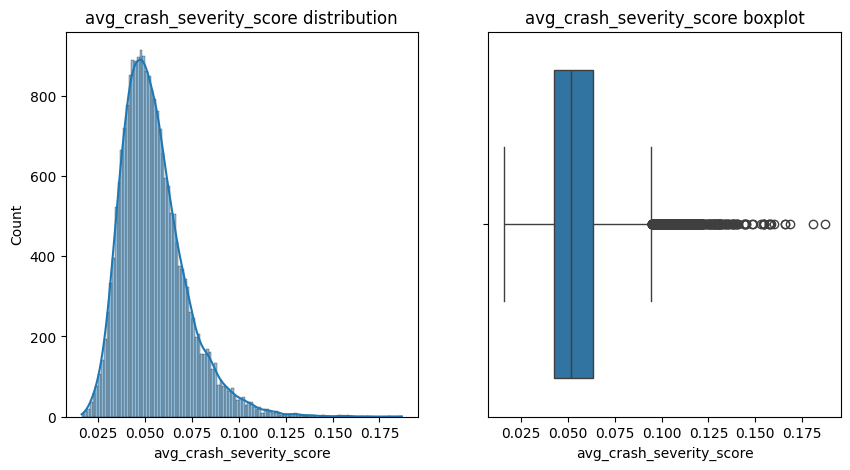

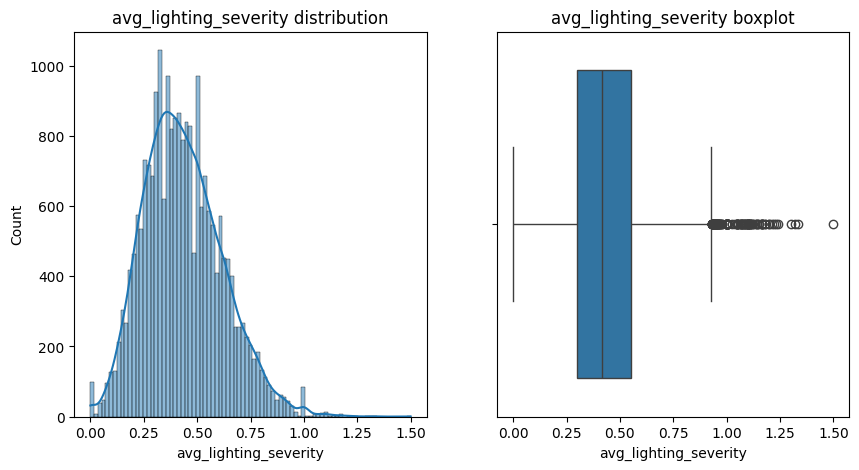

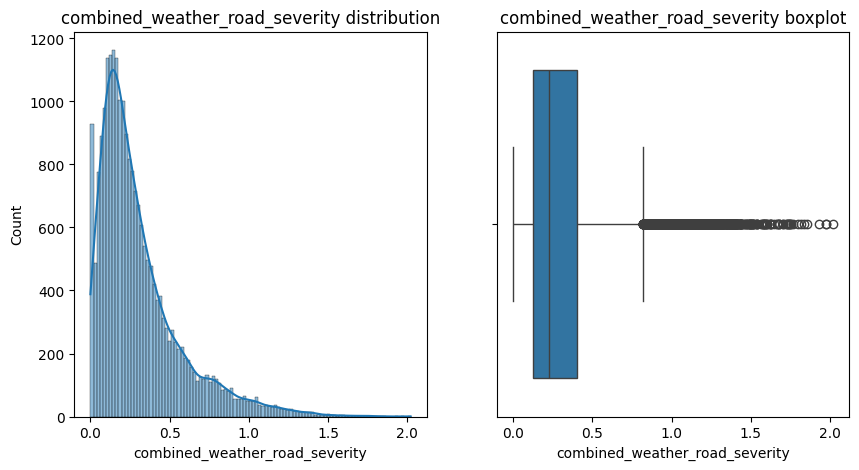

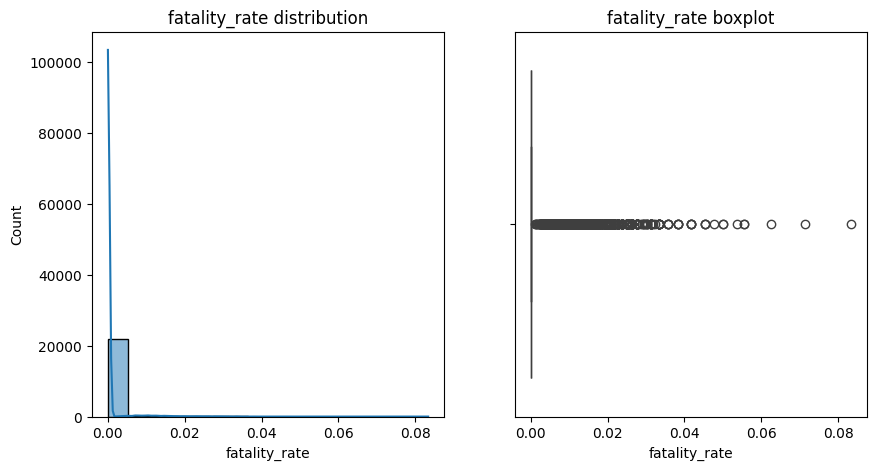

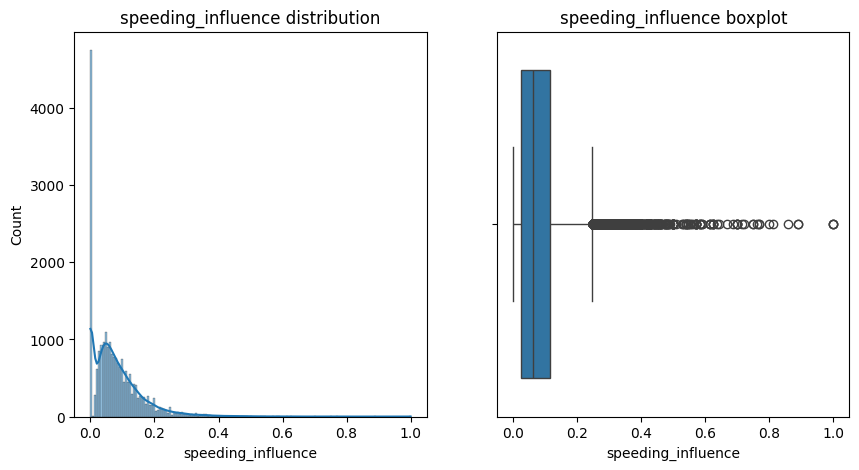

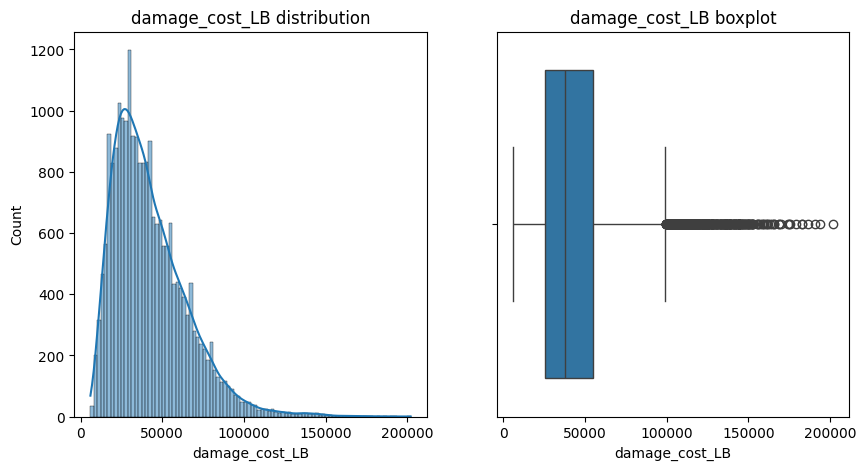

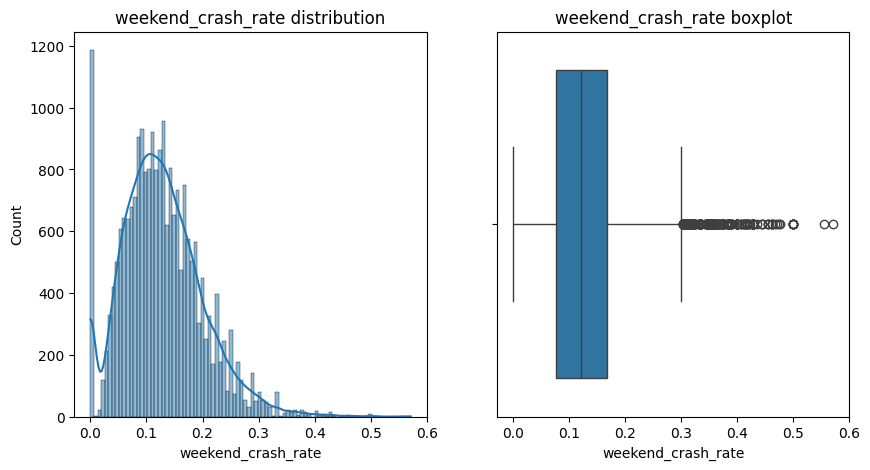

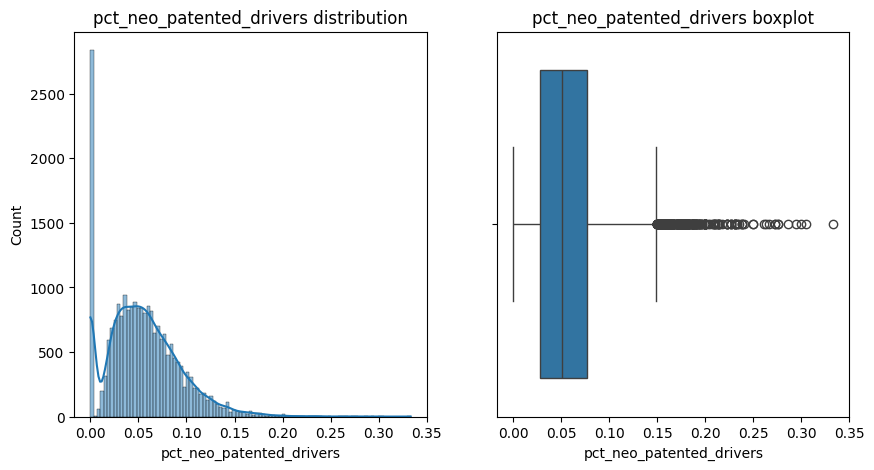

In [4]:
#for each features plot the distribution and a boxplot for each feature
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} distribution')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} boxplot')
    plt.show()

## Fatality rate

We use the 0.995 quantile to remove some outliers of the fatality rate.

In [5]:
percentile_99 = df['fatality_rate'].quantile(0.995)
outliers = df[df['fatality_rate'] > percentile_99]
outliers_count = outliers.copy()
outliers

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,damage_severity_avg,sum_speeding,sum_drinking,sum_telephone,AGE_GROUP_15_26,AGE_GROUP_26_33,AGE_GROUP_33_43,AGE_GROUP_43_55,AGE_GROUP_55_104,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity,towed_unit_rate
46,2018,1,432.0,0.715385,1.076923,1.000000,0.600000,27,0.027778,0.000000,0.057619,35.0,51,0.444444,0.370370,0.000000,0.111111,0.037037,2.0,3.0,40.0,3,6,5,16,32000,1.370370,8,0,0,5.0,2.0,4.0,6.0,7.0,13,12,2,11,6,8,1,1,25,0,0,0,2,16,6,5,0.0,0.0,31.0,1.0,0.0,45.125000,0.050000,0.075000,18895,0.002699,1.030769,0.000159
583,2018,3,433.0,0.776923,0.210526,0.187500,0.578947,19,0.026316,0.035088,0.072020,21.0,37,0.368421,0.105263,0.000000,0.105263,0.263158,7.0,2.0,30.0,4,1,3,15,26000,1.736842,4,1,1,11.0,2.0,4.0,3.0,5.0,12,7,0,15,4,0,0,0,16,0,0,0,3,15,1,3,0.0,0.0,24.0,0.0,3.0,36.040000,0.233333,0.066667,18450,0.002005,0.196711,0.000217
1399,2018,6,533.0,0.600000,0.000000,0.444444,0.400000,10,0.050000,0.000000,0.079206,15.0,18,0.200000,0.000000,0.200000,0.200000,0.100000,2.0,0.0,16.0,1,1,3,6,12500,1.500000,2,1,0,3.0,4.0,0.0,3.0,1.0,8,2,0,9,0,0,0,1,7,1,1,0,1,6,1,3,0.0,1.0,11.0,0.0,1.0,35.181818,0.125000,0.000000,21122,0.000852,0.266667,0.000047
1415,2018,6,714.0,0.590909,0.333333,0.684211,0.190476,21,0.031746,0.000000,0.077220,21.0,40,0.142857,0.142857,0.142857,0.000000,0.000000,4.0,0.0,37.0,6,2,3,16,28000,1.666667,2,0,0,8.0,5.0,10.0,6.0,2.0,18,3,0,16,5,0,0,0,16,3,0,0,2,16,2,3,0.0,0.0,32.0,0.0,2.0,35.935484,0.108108,0.000000,21122,0.001894,0.543860,0.000284
1681,2018,7,711.0,0.857143,0.125000,0.133333,0.500000,16,0.031250,0.000000,0.054630,11.0,31,0.375000,0.062500,0.062500,0.187500,0.312500,0.0,1.0,26.0,3,3,1,12,20500,1.562500,2,1,0,2.0,5.0,4.0,3.0,4.0,10,6,0,15,1,0,0,0,14,0,1,0,1,12,3,1,1.0,0.0,17.0,0.0,0.0,41.166667,0.000000,0.038462,20554,0.001508,0.130000,0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21143,2024,7,2222.0,0.660000,0.000000,0.133333,0.421053,19,0.026316,0.000000,0.138415,12.0,37,0.263158,0.000000,0.052632,0.105263,0.052632,3.0,3.0,29.0,2,3,3,13,24000,1.526316,1,0,0,7.0,3.0,5.0,0.0,4.0,14,5,0,19,0,0,0,0,14,0,0,1,4,13,3,3,0.0,0.0,27.0,0.0,0.0,38.263158,0.103448,0.103448,19250,0.001922,0.080000,0.000104
21146,2024,7,2233.0,0.475000,0.000000,0.000000,0.315789,19,0.026316,0.026316,0.093772,18.0,37,0.263158,0.000000,0.000000,0.105263,0.000000,0.0,2.0,29.0,1,1,3,15,26000,1.736842,2,1,0,3.0,4.0,7.0,3.0,3.0,14,5,0,18,0,0,0,1,15,0,0,0,4,15,1,3,0.0,0.0,24.0,1.0,2.0,40.550000,0.000000,0.068966,19250,0.001922,0.000000,0.000052
21419,2024,8,2422.0,0.680000,0.062500,0.000000,0.277778,20,0.025000,0.050000,0.064817,20.0,40,0.250000,0.000000,0

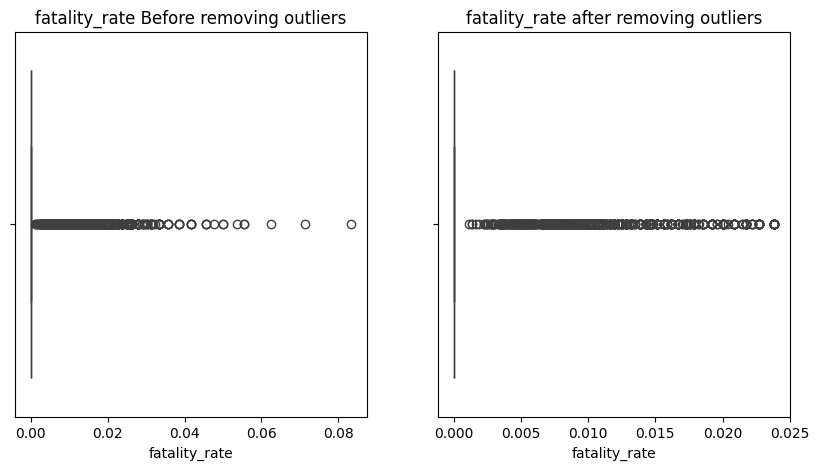

In [6]:
df_cleaned = df.drop(outliers.index)
feature = 'fatality_rate'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature])
plt.title(f'{feature} Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature])
plt.title(f'{feature} after removing outliers')
plt.show()

## AVERAGE CRASH SEVERITY

We use the IQR Method, since the data is right-skewed we use the upperbound and we use 2.5 instead of 1.5 to remove higher outliers.

In [ ]:
Q1 = df['avg_crash_severity_score'].quantile(0.25)
Q3 = df['avg_crash_severity_score'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 +  2.5 * IQR
lower_bound = Q1 - 2.5 * IQR
outliers = df[(df['avg_crash_severity_score'] > upper_bound)]
outliers_count = pd.concat([outliers_count, outliers])
outliers

np.float64(-0.00973656675980139)

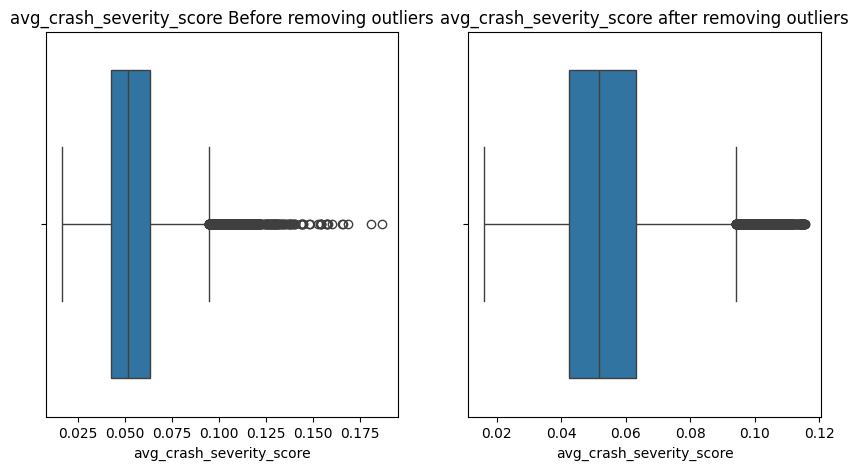

In [8]:
df_cleaned = df.drop(outliers.index)
feature = 'avg_crash_severity_score'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature])
plt.title(f'{feature} Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature])
plt.title(f'{feature} after removing outliers')
plt.show()

## WEEKEND_CRASH_RATE

In [ ]:
from sklearn.ensemble import IsolationForest
# The contamiantion is used to set the percentage of outliers in the dataset
clf = IsolationForest(contamination=0.005)
clf.fit(df['weekend_crash_rate'].values.reshape(-1, 1))
outliers = df[clf.predict(df['weekend_crash_rate'].values.reshape(-1, 1)) == -1]
outliers_count = pd.concat([outliers_count, outliers])
outliers

np.float64(0.3703703703703703)

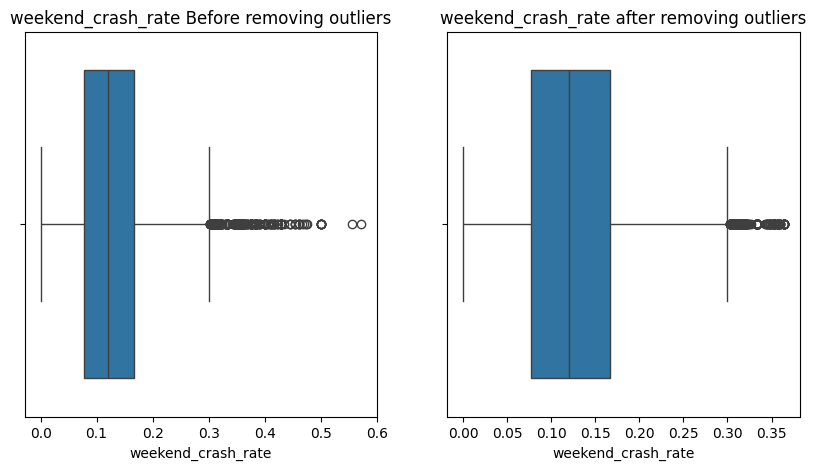

In [10]:
df_cleaned = df.drop(outliers.index)
feature = 'weekend_crash_rate'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature])
plt.title(f'{feature} Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature])
plt.title(f'{feature} after removing outliers')
plt.show()

## pct_neo_patented_drivers

In [ ]:
#isolation forest in the feature "weekend_crash_rate"
from sklearn.ensemble import IsolationForest
# The contamiantion is used to set the percentage of outliers in the dataset
clf = IsolationForest(contamination=0.005)
clf.fit(df['pct_neo_patented_drivers'].values.reshape(-1, 1))
outliers = df[clf.predict(df['pct_neo_patented_drivers'].values.reshape(-1, 1)) == -1]
outliers_count = pd.concat([outliers_count, outliers])
outliers

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,damage_severity_avg,sum_speeding,sum_drinking,sum_telephone,AGE_GROUP_15_26,AGE_GROUP_26_33,AGE_GROUP_33_43,AGE_GROUP_43_55,AGE_GROUP_55_104,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity,towed_unit_rate
8930,2020,10,934.0,0.580000,0.428571,0.166667,0.285714,7,0.0,0.000000,0.054483,3.0,16,0.285714,0.142857,0.000000,0.000000,0.000000,4.0,0.0,12.0,3,0,1,6,10000,1.857143,1,0,0,7.0,1.0,1.0,1.0,1.0,5,2,0,5,1,0,0,1,6,0,0,0,1,6,0,1,0.0,0.0,12.0,0.0,0.0,29.636364,0.333333,0.000000,17004,0.000941,0.271429,0.000176
8728,2020,9,1613.0,0.525000,0.363636,0.200000,0.636364,12,0.0,0.000000,0.045168,1.0,23,0.500000,0.166667,0.000000,0.083333,0.000000,7.0,2.0,23.0,1,1,3,8,15500,1.583333,0,0,0,10.0,2.0,2.0,3.0,5.0,5,6,1,9,2,0,0,1,10,0,0,0,2,8,1,3,0.0,0.0,23.0,0.0,0.0,36.136364,0.304348,0.086957,16918,0.001359,0.265455,0.000059
588,2018,3,522.0,0.725000,0.000000,0.000000,1.166667,7,0.0,0.000000,0.048743,1.0,16,0.714286,0.000000,0.000000,0.142857,0.142857,3.0,0.0,10.0,1,0,2,5,9500,1.714286,1,0,0,5.0,2.0,1.0,1.0,0.0,1,5,1,7,0,0,0,0,6,0,0,0,1,5,0,2,0.0,0.0,9.0,0.0,0.0,27.888889,0.300000,0.000000,18450,0.000867,0.000000,0.000054
15696,2022,11,1512.0,0.620000,0.200000,0.333333,0.500000,10,0.0,0.000000,0.091951,1.0,23,0.500000,0.100000,0.000000,0.200000,0.000000,5.0,0.0,17.0,1,1,0,9,14000,1.800000,1,0,0,6.0,3.0,3.0,0.0,1.0,5,5,0,7,3,0,0,0,6,0,0,0,4,9,1,0,0.0,0.0,14.0,0.0,0.0,29.923077,0.294118,0.000000,17676,0.001301,0.280000,0.000057
10151,2021,3,111.0,0.727273,0.000000,0.000000,0.823529,17,0.0,0.068627,0.102135,18.0,32,0.647059,0.000000,0.000000,0.176471,0.176471,8.0,0.0,28.0,1,3,5,9,20000,1.352941,2,0,0,10.0,4.0,2.0,3.0,0.0,6,11,0,17,0,0,0,0,17,0,0,0,0,9,3,5,2.0,0.0,21.0,0.0,1.0,29.263158,0.285714,0.000000,15504,0.002064,0.000000,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,2021,6,1413.0,0.666667,0.375000,0.133333,0.250000,16,0.0,0.000000,0.039571,3.0,34,0.187500,0.125000,0.000000,0.000000,0.062500,5.0,1.0,27.0,3,3,3,10,19500,1.437500,0,0,0,10.0,7.0,2.0,1.0,4.0,13,3,0,13,2,0,0,1,15,0,0,0,1,10,3,3,0.0,0.0,24.0,0.0,0.0,33.500000,0.185185,0.037037,20893,0.001627,0.230000,0.000144
2910,2018,11,2211.0,0.718421,0.894737,0.672727,0.714286,60,0.0,0.000000,0.046129,5.0,116,0.483333,0.300000,0.033333,0.133333,0.116667,19.0,12.0,103.0,11,5,17,38,76500,1.550000,15,2,0,24.0,4.0,14.0,17.0,22.0,27,29,4,32,16,8,1,3,54,0,1,1,4,38,5,17,0.0,0.0,89.0,0.0,2.0,43.012346,0.184466,0.116505,18736,0.006191,0.761531,0.000587
19735,2024,2,1612.0,0.660000,0.157895,0.117647,0.526316,22,0.0,0.000000,0.036517,1.0,47,0.318182,0.045455,0.090909,0.000000,0.181818,7.0,2.0,38.0,6,0,6,

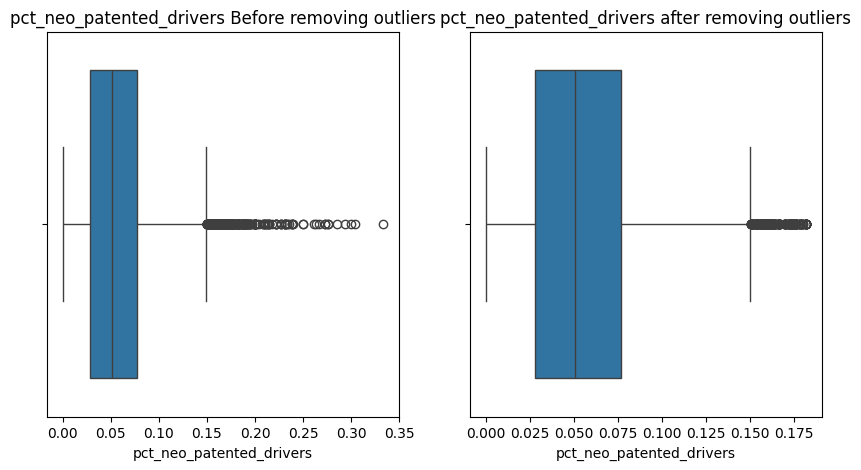

In [11]:
df_cleaned = df.drop(outliers.index)
feature = 'pct_neo_patented_drivers'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature])
plt.title(f'{feature} Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature])
plt.title(f'{feature} after removing outliers')
plt.show()

## Damage_cost_LB

In [12]:
Q1 = df['damage_cost_LB'].quantile(0.25)
Q3 = df['damage_cost_LB'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 +  2.5 * IQR
outliers = df[(df['damage_cost_LB'] > upper_bound)]
outliers_count = pd.concat([outliers_count, outliers])
outliers

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,damage_severity_avg,sum_speeding,sum_drinking,sum_telephone,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity,towed_unit_rate
210,2018,1,1834.0,0.689706,0.473214,0.490741,0.594828,118,0.0,0.009887,0.058335,29.0,240,0.449153,0.161017,0.025424,0.110169,0.050847,2.0,13.0,219.0,15,19,36,63,140000,1.372881,11,2,0,63,53,2,79,24,5,5,5,106,3,0,0,9,63,19,36,0.0,0.0,194.0,7.0,8.0,41.989189,0.009132,0.059361,18895,0.012702,0.483730,0.000794
477,2018,2,1834.0,0.672857,0.557522,0.737864,0.529412,120,0.0,0.004167,0.059679,13.0,238,0.425000,0.183333,0.058333,0.100000,0.100000,7.0,14.0,220.0,10,16,50,54,139000,1.316667,16,0,0,68,51,1,65,30,14,1,10,98,5,0,2,15,54,16,50,1.0,0.0,189.0,7.0,4.0,41.464286,0.031818,0.063636,17104,0.013915,0.665727,0.000585
689,2018,3,1232.0,0.678333,0.216981,0.110000,0.528302,107,0.0,0.014019,0.051507,21.0,209,0.392523,0.084112,0.009346,0.037383,0.149533,10.0,8.0,192.0,10,15,30,62,130500,1.439252,23,4,0,64,42,1,94,10,0,0,3,99,0,0,1,7,62,15,30,0.0,1.0,162.0,3.0,10.0,39.706294,0.052083,0.041667,18450,0.011328,0.152792,0.000542
743,2018,3,1831.0,0.646269,0.043860,0.080808,0.535088,118,0.0,0.008475,0.042993,13.0,240,0.449153,0.016949,0.025424,0.067797,0.144068,1.0,14.0,221.0,13,23,39,56,134500,1.279661,8,1,0,61,53,4,105,4,0,0,9,96,1,2,0,19,56,23,39,1.0,0.0,195.0,4.0,7.0,41.189189,0.004525,0.063348,18450,0.013008,0.066029,0.000705
746,2018,3,1834.0,0.651316,0.139344,0.127273,0.300813,126,0.0,0.000000,0.040205,3.0,249,0.246032,0.055556,0.015873,0.087302,0.126984,15.0,6.0,229.0,13,22,48,56,143000,1.269841,13,1,0,92,31,3,107,8,1,0,10,109,1,0,1,15,56,22,48,0.0,0.0,186.0,9.0,11.0,40.398876,0.065502,0.026201,18450,0.013496,0.132101,0.000705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21528,2024,9,813.0,0.634426,0.287037,0.114943,0.247706,119,0.0,0.000000,0.047686,13.0,248,0.176471,0.117647,0.008403,0.067227,0.201681,7.0,13.0,215.0,8,7,37,75,153000,1.571429,8,1,0,88,21,10,92,14,0,0,13,86,1,0,0,32,75,7,37,2.0,0.0,176.0,5.0,6.0,42.360248,0.032558,0.060465,19661,0.012614,0.183780,0.000407
21530,2024,9,815.0,0.635185,0.160000,0.112500,0.465347,107,0.0,0.004206,0.045281,30.0,222,0.317757,0.074766,0.000000,0.084112,0.102804,10.0,12.0,193.0,10,7,23,77,142000,1.654206,8,0,0,67,34,6,86,10,0,0,11,80,0,0,0,27,77,7,23,3.0,0.0,164.0,3.0,8.0,40.039216,0.051813,0.062176,19661,0.011291,0.131500,0.000509
22191,2024,11,1834.0,0.664444,0.537634,0.275362,0.677083,103,0.0,0.000000,0.057883,4.0,201,0.504854,0.184466,0.000000,0.203883,0.135922,2.0,10.0,184.0,10,7,24,72,135500,1.631068,9,1,0,44,52,7,62,21,3,0,17,70,0,0,0,33,72,7,24,1.0,0.0,151.0,12.0,5.0,41.870229,0.010870,0.054348,17896

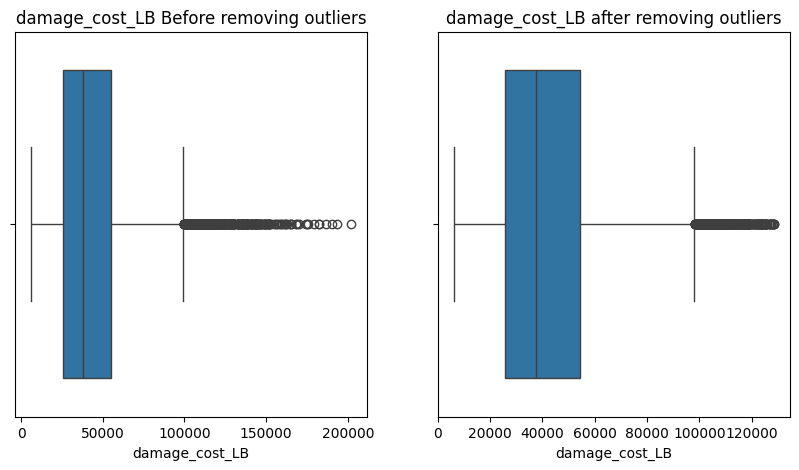

In [13]:
df_cleaned = df.drop(outliers.index)
feature = 'damage_cost_LB'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature])
plt.title(f'{feature} Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature])
plt.title(f'{feature} after removing outliers')
plt.show()

## avg_lighting_severity

In [14]:
Q1 = df['avg_lighting_severity'].quantile(0.25)
Q3 = df['avg_lighting_severity'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 +  2 * IQR
outliers = df[(df['avg_lighting_severity'] > upper_bound)]
outliers_count = pd.concat([outliers_count, outliers])
outliers

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,damage_severity_avg,sum_speeding,sum_drinking,sum_telephone,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity,towed_unit_rate
113,2018,1,934.0,0.557143,0.500000,0.444444,1.100000,10,0.000000,0.000000,0.053086,2.0,18,0.600000,0.200000,0.000000,0.200000,0.200000,0.0,0.0,17.0,1,2,4,4,11000,1.200000,1,0,0,4,6,0,7,1,0,1,1,9,0,0,0,1,4,2,4,0.0,0.0,14.0,0.0,1.0,45.909091,0.000000,0.000000,18895,0.000953,0.466667,0.000053
135,2018,1,1124.0,0.925000,1.000000,0.875000,1.111111,10,0.000000,0.000000,0.043474,0.0,20,0.600000,0.400000,0.000000,0.000000,0.100000,0.0,1.0,18.0,1,2,3,5,11500,1.300000,4,0,0,3,6,1,4,3,1,1,1,9,0,0,0,1,5,2,3,0.0,0.0,13.0,0.0,0.0,39.111111,0.000000,0.055556,18895,0.001058,0.925000,0.000053
588,2018,3,522.0,0.725000,0.000000,0.000000,1.166667,7,0.000000,0.000000,0.048743,1.0,16,0.714286,0.000000,0.000000,0.142857,0.142857,3.0,0.0,10.0,1,0,2,5,9500,1.714286,1,0,0,1,5,1,7,0,0,0,0,6,0,0,0,1,5,0,2,0.0,0.0,9.0,0.0,0.0,27.888889,0.300000,0.000000,18450,0.000867,0.000000,0.000054
615,2018,3,726.0,0.620000,0.500000,0.363636,1.083333,12,0.000000,0.041667,0.078596,5.0,24,0.583333,0.166667,0.000000,0.083333,0.000000,1.0,2.0,20.0,3,1,4,7,15000,1.500000,4,0,0,5,7,0,9,2,1,0,0,11,0,0,0,1,7,1,4,0.0,0.0,19.0,0.0,0.0,45.714286,0.050000,0.100000,18450,0.001301,0.418182,0.000163
3014,2018,12,713.0,0.785714,0.230769,0.384615,1.117647,17,0.029412,0.029412,0.063767,19.0,32,0.764706,0.058824,0.058824,0.058824,0.411765,2.0,2.0,26.0,0,5,3,9,19000,1.235294,2,0,0,4,13,0,10,2,1,0,4,14,0,1,0,2,9,5,3,0.0,0.0,22.0,0.0,1.0,36.833333,0.076923,0.076923,19962,0.001603,0.323077,0.000000
3054,2018,12,933.0,0.750000,0.200000,0.222222,1.181818,11,0.000000,0.000000,0.086776,2.0,20,0.818182,0.090909,0.000000,0.000000,0.000000,0.0,2.0,17.0,2,0,3,8,15000,1.727273,2,0,0,2,9,0,8,2,0,0,1,10,0,0,0,1,8,0,3,0.0,0.0,10.0,0.0,4.0,47.000000,0.000000,0.117647,19962,0.001002,0.213333,0.000100
3064,2018,12,1024.0,0.728571,0.307692,0.454545,1.230769,13,0.000000,0.000000,0.076917,0.0,25,0.846154,0.076923,0.076923,0.000000,0.384615,0.0,0.0,19.0,2,3,4,6,14500,1.230769,2,0,0,2,11,0,8,3,1,0,1,11,0,1,0,1,6,3,4,0.0,0.0,12.0,1.0,1.0,42.250000,0.000000,0.000000,19962,0.001252,0.395804,0.000100
3161,2018,12,1924.0,0.587500,0.947368,0.529412,1.150000,24,0.000000,0.000000,0.082928,4.0,48,0.666667,0.291667,0.000000,0.208333,0.166667,2.0,3.0,42.0,1,2,8,14,30000,1.500000,4,0,0,4,16,4,9,7,1,1,6,18,0,0,0,6,14,2,8,0.0,0.0,39.0,0.0,0.0,38.875000,0.047619,0.071429,19962,0.002405,0.696594,0.000050
3228,2019,1,223.0,0.528571,1.555556,1.250000,1.111111,10,0.000000,0.000000,0.121988,7.0,22,0.600000,0.500000,0.000000,0.200000,0.100000,0.0,2.0,14.0,2,2,2,6,12000,1.400000,1,0,0,3,6,1,3,1,4,1,1,8,0,0,0,2,6,2,2,0.0,0.0,12.0,0.0,1.0,41.153846,0.000000,0.142857,18001,0.001222,1.372222,0.000111
3236,2019,1,311.0,0.712500,1.666667

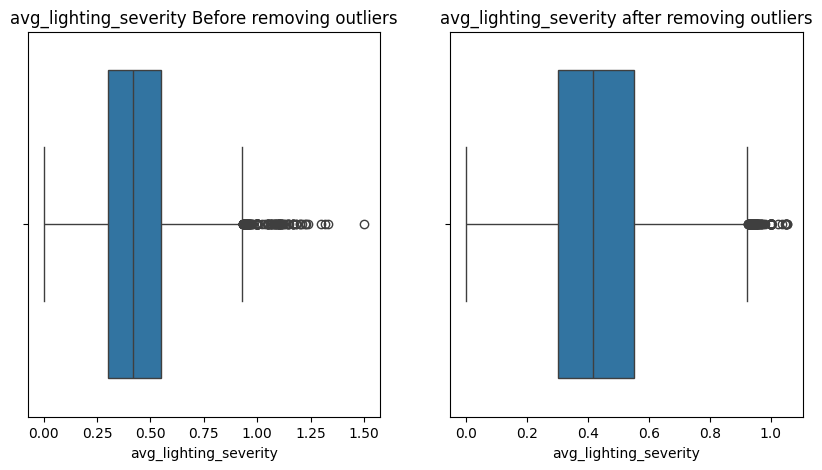

In [15]:
df_cleaned = df.drop(outliers.index)
feature = 'avg_lighting_severity'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature])
plt.title(f'{feature} Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature])
plt.title(f'{feature} after removing outliers')
plt.show()

## combined_weather_road_severity

In [16]:
percentile_99 = df['combined_weather_road_severity'].quantile(0.995)
outliers = df[df['combined_weather_road_severity'] > percentile_99]
outliers_count = pd.concat([outliers_count, outliers])
outliers

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,damage_severity_avg,sum_speeding,sum_drinking,sum_telephone,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity,towed_unit_rate
321,2018,2,522.0,0.466667,1.800000,1.142857,0.666667,10,0.0,0.000000,0.077748,2.0,19,0.600000,0.600000,0.000000,0.100000,0.300000,0.0,0.0,12.0,1,2,1,7,12500,1.500000,4,0,0,3,6,1,3,1,6,0,0,7,0,0,0,3,7,2,1,0.0,0.0,9.0,0.0,0.0,31.800000,0.000000,0.000000,17104,0.001111,1.405714,0.000058
325,2018,2,532.0,0.460000,1.428571,2.333333,0.571429,7,0.0,0.000000,0.089457,0.0,12,0.571429,0.571429,0.285714,0.285714,0.000000,0.0,1.0,9.0,2,0,1,6,10000,1.857143,2,0,0,3,4,0,1,3,3,0,0,4,2,0,0,1,6,0,1,0.0,0.0,8.0,0.0,0.0,48.000000,0.000000,0.111111,17104,0.000702,1.971429,0.000117
328,2018,2,612.0,0.466667,1.590909,1.235294,0.545455,22,0.0,0.000000,0.028084,0.0,47,0.363636,0.545455,0.000000,0.136364,0.227273,1.0,2.0,34.0,1,5,7,10,24500,1.227273,2,1,0,14,8,0,8,3,10,0,1,17,0,0,0,5,10,5,7,1.0,0.0,24.0,3.0,3.0,44.727273,0.029412,0.058824,17104,0.002748,1.377540,0.000058
337,2018,2,633.0,0.677778,1.125000,1.600000,0.352941,17,0.0,0.000000,0.032004,3.0,33,0.294118,0.352941,0.117647,0.176471,0.235294,0.0,4.0,28.0,2,4,8,5,17500,1.058824,3,0,0,12,5,0,4,4,9,0,0,13,1,1,0,2,5,4,8,0.0,0.0,25.0,0.0,1.0,49.125000,0.000000,0.142857,17104,0.001929,1.410000,0.000117
379,2018,2,932.0,0.725000,1.909091,1.500000,0.416667,12,0.0,0.041667,0.104851,7.0,26,0.416667,0.583333,0.000000,0.000000,0.083333,0.0,0.0,19.0,3,2,5,5,13500,1.250000,4,0,0,7,5,0,1,3,6,0,2,11,0,0,0,1,5,2,5,0.0,0.0,16.0,2.0,0.0,36.750000,0.000000,0.000000,17104,0.001520,1.663636,0.000175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19451,2024,1,1423.0,0.533333,1.545455,1.444444,0.307692,14,0.0,0.000000,0.062941,0.0,30,0.214286,0.500000,0.071429,0.000000,0.142857,1.0,3.0,22.0,2,1,4,9,18000,1.571429,1,0,0,10,3,1,1,4,5,0,4,8,0,1,0,5,9,1,4,0.0,0.0,20.0,1.0,0.0,38.444444,0.045455,0.136364,16345,0.001835,1.484848,0.000122
19452,2024,1,1424.0,0.692857,1.615385,1.315789,0.653846,28,0.0,0.000000,0.096875,4.0,56,0.464286,0.500000,0.035714,0.071429,0.035714,2.0,1.0,43.0,2,5,3,20,35500,1.535714,3,0,0,13,13,2,6,9,9,2,2,18,0,1,0,9,20,5,3,0.0,0.0,34.0,1.0,1.0,38.458333,0.046512,0.023256,16345,0.003426,1.435628,0.000122
19457,2024,1,1511.0,0.820000,1.600000,1.285714,0.500000,13,0.0,0.000000,0.047771,0.0,29,0.384615,0.384615,0.000000,0.000000,0.153846,0.0,1.0,23.0,4,0,3,10,18000,1.769231,2,0,0,7,5,1,2,4,3,2,2,7,0,0,0,6,10,0,3,0.0,0.0,19.0,1.0,0.0,34.615385,0.000000,0.043478,16345,0.001774,1.411429,0.000245
19461,2024,1,1523.0,0.200000,1.777778,1.727273,0.777778,19,0.0,0.000000,0.038251,2.0,42,0.631579,0.578947,0.000000,0.000000,0.1578

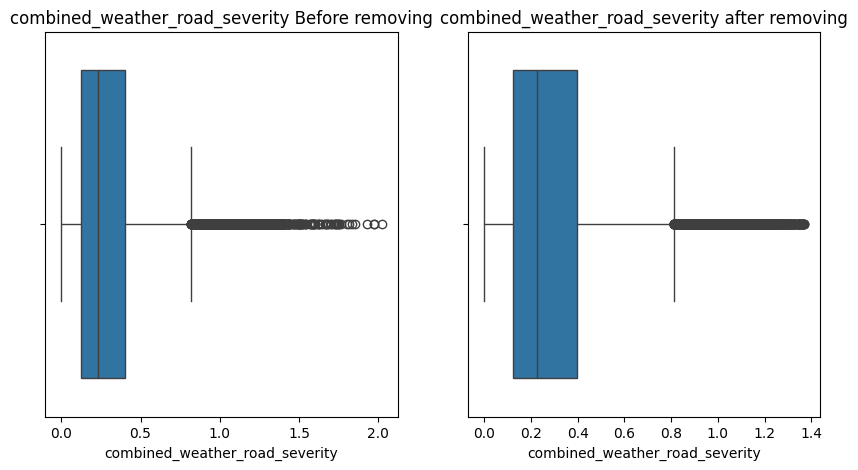

In [17]:
df_cleaned = df.drop(outliers.index)
feature = 'combined_weather_road_severity'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature])
plt.title(f'{feature} Before removing')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature])
plt.title(f'{feature} after removing')
plt.show()

# speeding_influence

In [18]:
from sklearn.ensemble import IsolationForest
# The contamiantion is used to set the percentage of outliers in the dataset
clf = IsolationForest(contamination=0.005)
clf.fit(df['speeding_influence'].values.reshape(-1, 1))
outliers = df[clf.predict(df['speeding_influence'].values.reshape(-1, 1)) == -1]
outliers_count = pd.concat([outliers_count, outliers])
outliers

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,damage_severity_avg,sum_speeding,sum_drinking,sum_telephone,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity,towed_unit_rate
2865,2018,11,1654.0,0.600000,1.125000,0.750000,0.888889,9,0.000000,0.000000,0.025904,0.0,18,0.555556,0.444444,0.000000,0.444444,0.111111,0.0,1.0,17.0,1,2,1,6,11000,1.444444,1,0,0,4,5,0,3,4,1,0,1,9,0,0,0,0,6,2,1,0.0,0.0,14.0,0.0,0.0,38.916667,0.000000,0.058824,18736,0.000961,0.900000,0.000053
4195,2019,4,1654.0,0.662500,0.750000,0.300000,0.250000,12,0.000000,0.000000,0.054239,5.0,25,0.166667,0.333333,0.000000,0.583333,0.083333,2.0,2.0,25.0,1,0,5,7,15500,1.583333,1,0,0,10,2,0,7,4,1,0,0,10,0,0,0,2,7,0,5,1.0,0.0,21.0,0.0,2.0,42.666667,0.080000,0.080000,18745,0.001334,0.480000,0.000053
4463,2019,5,1654.0,0.607692,0.222222,0.588235,0.333333,18,0.027778,0.000000,0.067173,11.0,34,0.222222,0.055556,0.166667,0.555556,0.111111,0.0,3.0,33.0,2,2,5,11,22500,1.500000,5,1,0,14,4,0,15,3,0,0,0,14,1,0,2,1,11,2,5,0.0,0.0,29.0,1.0,2.0,46.166667,0.000000,0.090909,21297,0.001596,0.441830,0.000094
4733,2019,6,1654.0,0.650000,0.000000,0.000000,0.000000,9,0.000000,0.000000,0.032702,1.0,19,0.000000,0.000000,0.000000,0.888889,0.000000,0.0,1.0,19.0,1,0,2,7,12500,1.777778,1,0,0,8,0,1,9,0,0,0,0,9,0,0,0,0,7,0,2,0.0,0.0,17.0,0.0,1.0,45.294118,0.000000,0.052632,21343,0.000890,0.000000,0.000047
5272,2019,8,1654.0,0.660000,0.266667,0.200000,0.000000,15,0.000000,0.000000,0.027243,1.0,30,0.000000,0.133333,0.000000,0.466667,0.066667,0.0,2.0,27.0,0,1,6,8,18500,1.466667,4,0,0,15,0,0,12,3,0,0,0,15,0,0,0,0,8,1,6,0.0,0.0,25.0,1.0,0.0,42.428571,0.000000,0.074074,19871,0.001510,0.226667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21361,2024,8,1654.0,0.650000,0.153846,0.076923,0.461538,14,0.000000,0.000000,0.069217,1.0,24,0.285714,0.071429,0.000000,0.500000,0.214286,1.0,0.0,24.0,3,2,1,11,18500,1.642857,0,0,0,9,4,1,12,1,0,0,1,13,0,0,0,1,11,2,1,0.0,0.0,21.0,0.0,2.0,41.083333,0.041667,0.000000,19949,0.001203,0.107692,0.000150
21631,2024,9,1654.0,0.637500,0.090909,0.090909,0.454545,11,0.000000,0.000000,0.053740,3.0,22,0.363636,0.000000,0.000000,0.545455,0.181818,1.0,1.0,21.0,2,1,1,9,15000,1.727273,0,0,0,7,4,0,10,1,0,0,0,11,0,0,0,0,9,1,1,1.0,0.0,17.0,2.0,1.0,38.833333,0.047619,0.047619,19661,0.001119,0.090909,0.000102
21901,2024,10,1654.0,0.622222,0.058824,0.000000,0.470588,17,0.000000,0.000000,0.035031,1.0,36,0.411765,0.000000,0.000000,0.529412,0.058824,0.0,2.0,35.0,3,3,3,11,21000,1.470588,1,0,0,10,7,0,16,0,0,0,1,13,0,0,0,4,11,3,3,0.0,0.0,32.0,0.0,2.0,39.560000,0.000000,0.057143,19869,0.001812,0.023529,0.000151
22170,2024,11,1654.0,0.590000,1.307692,0.727273,0.461538,13,0.000000,0

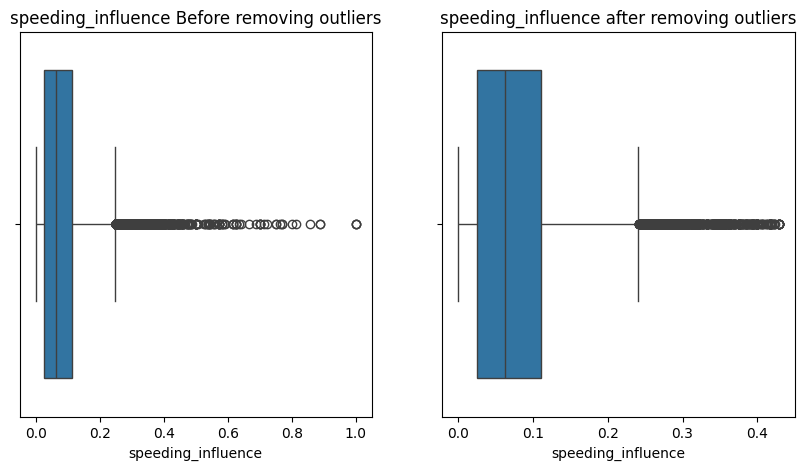

In [19]:
df_cleaned = df.drop(outliers.index)
feature = 'speeding_influence'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature])
plt.title(f'{feature} Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature])
plt.title(f'{feature} after removing outliers')
plt.show()

In [20]:
outliers_count.drop_duplicates()
df_cleaned = df.drop(outliers_count.index)
df_cleaned.shape

(21690, 58)

In [21]:
df.shape

(22516, 58)

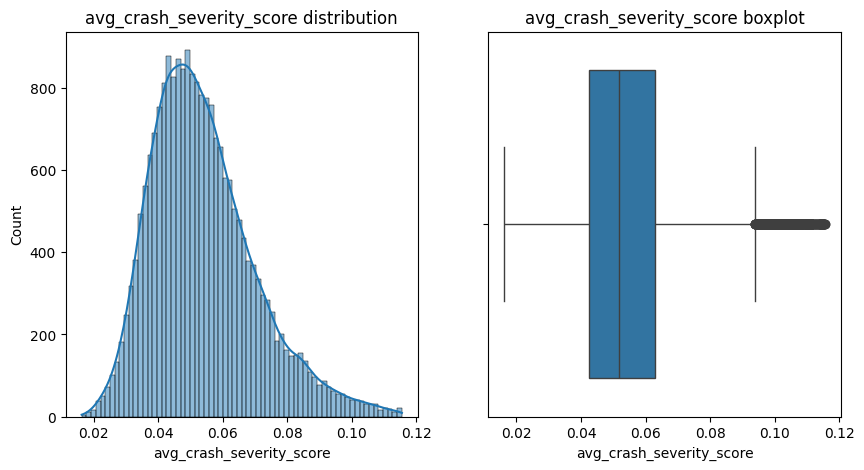

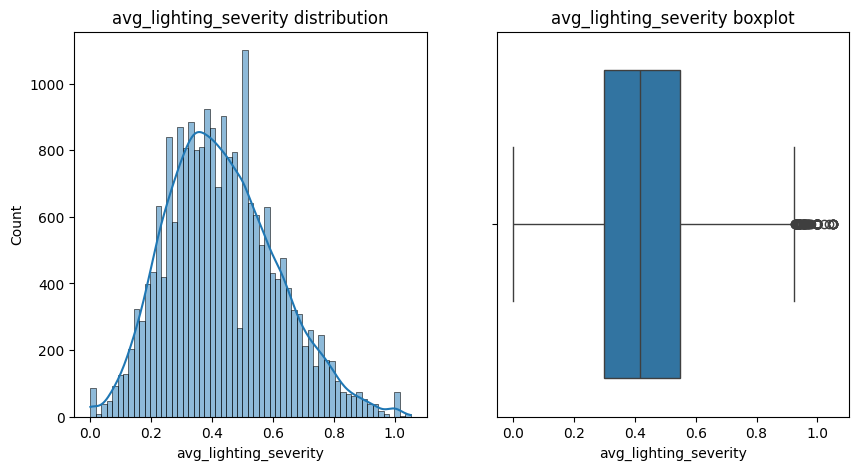

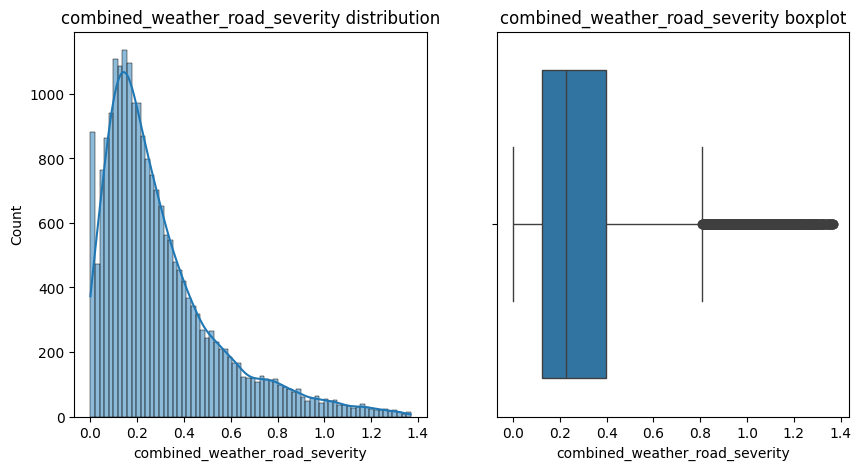

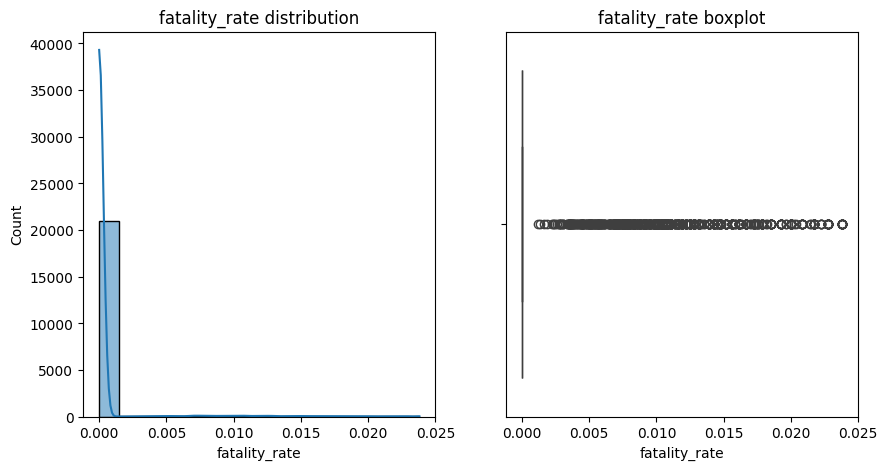

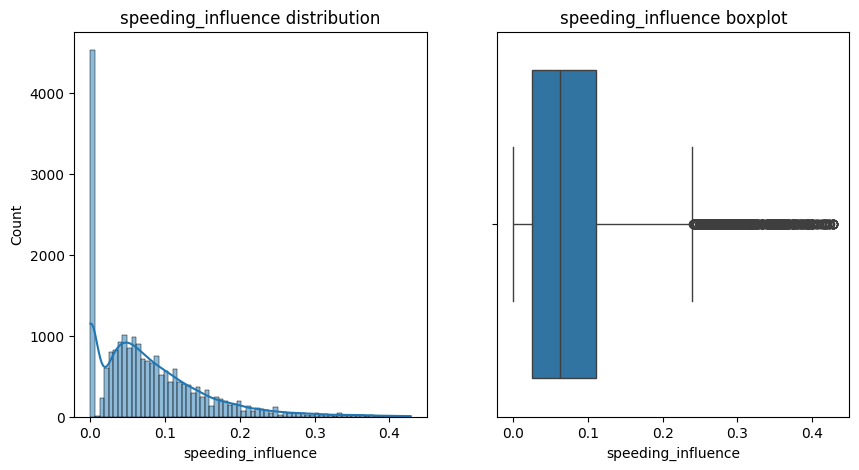

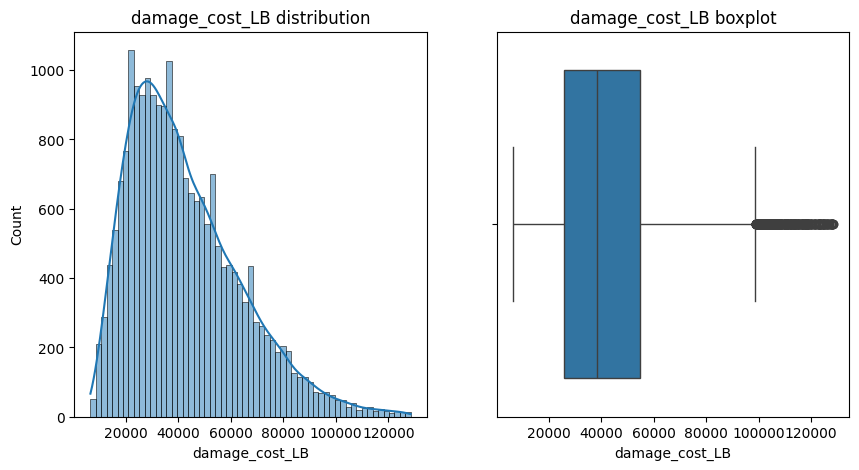

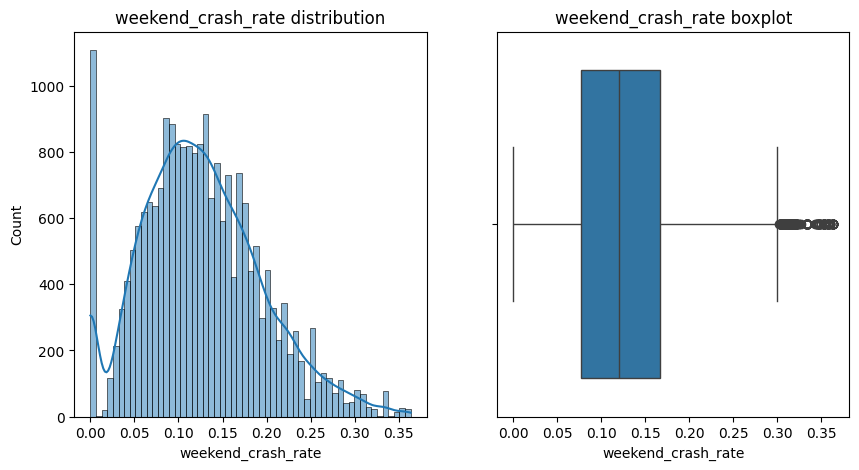

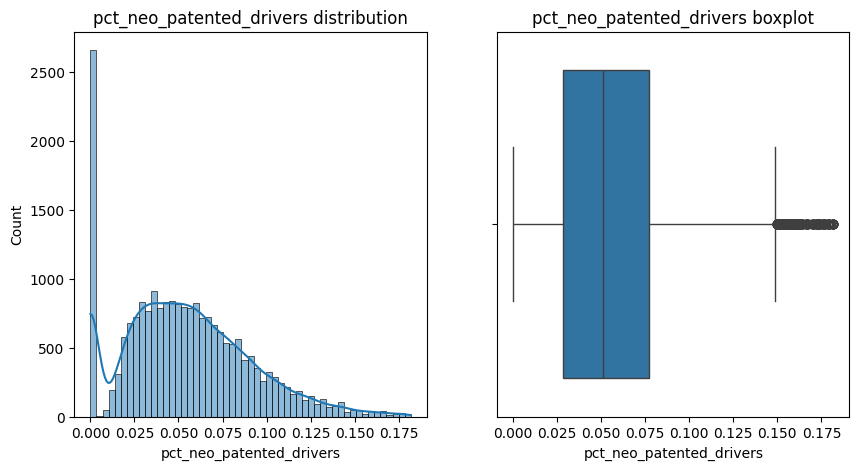

In [22]:
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'{feature} distribution')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[feature])
    plt.title(f'{feature} boxplot')
    plt.show()

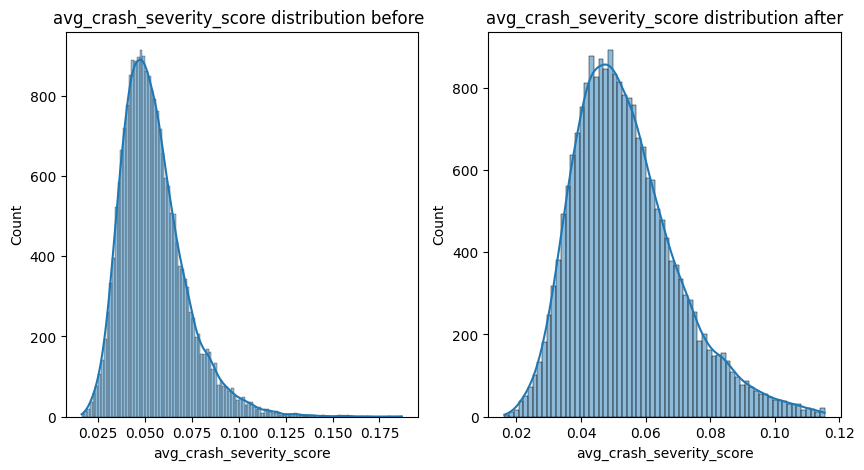

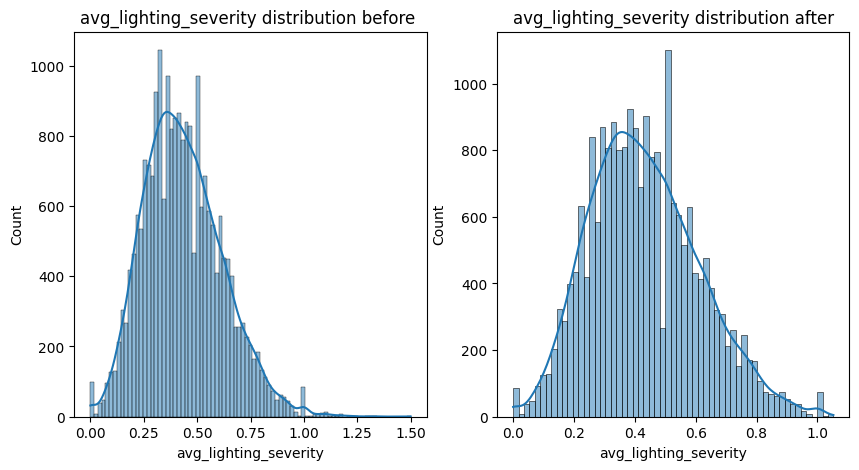

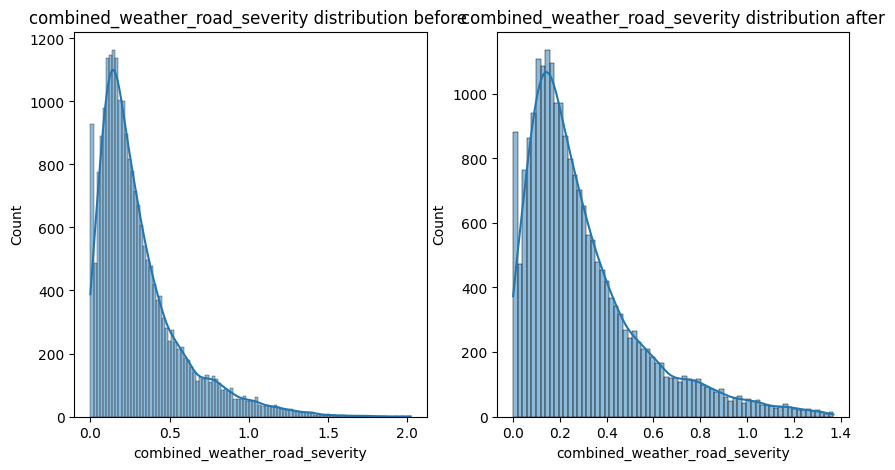

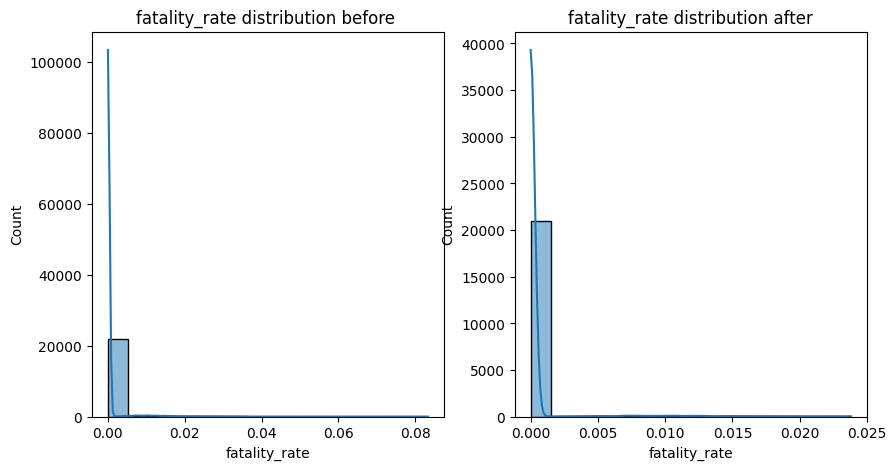

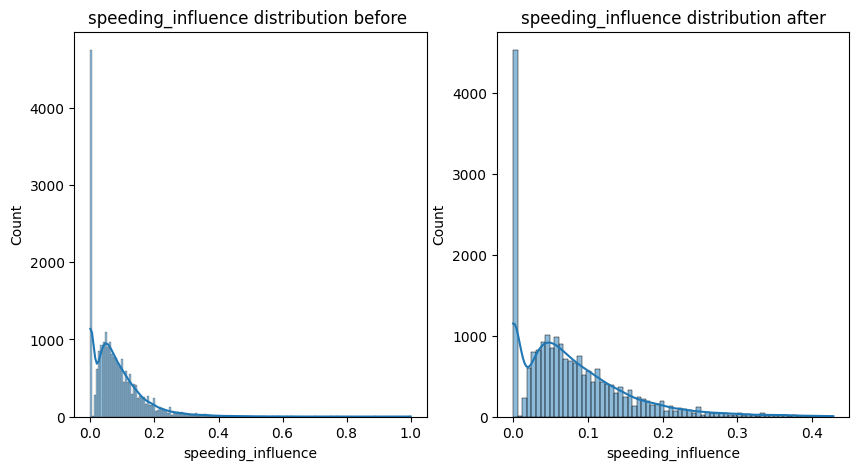

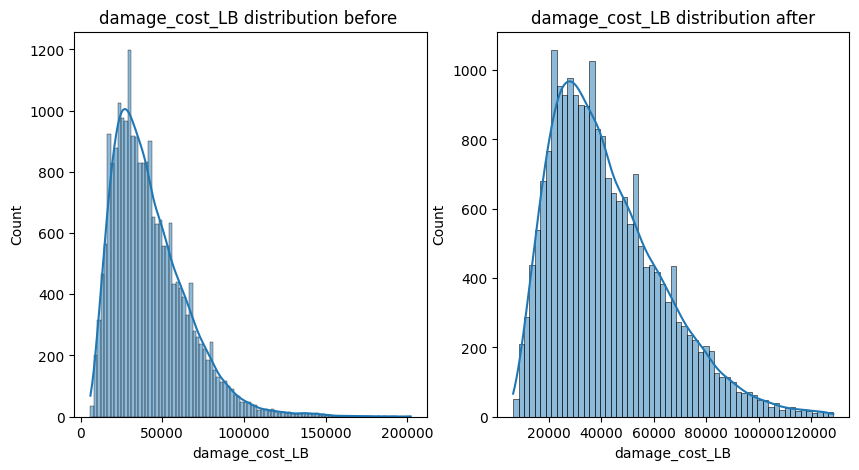

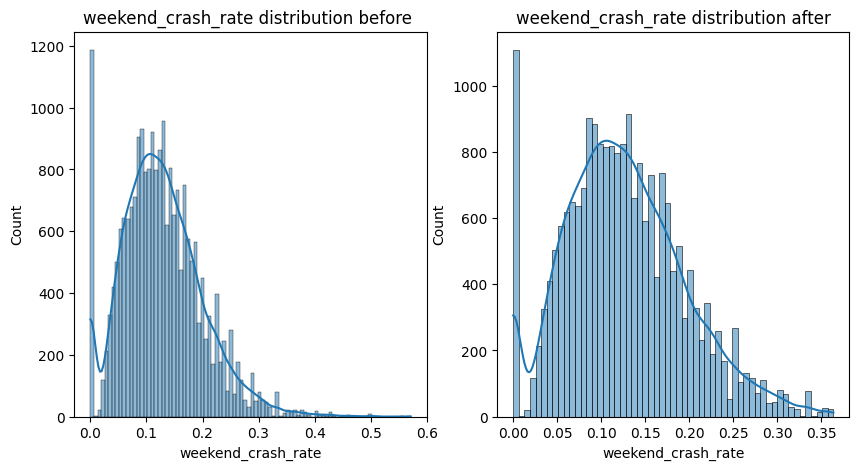

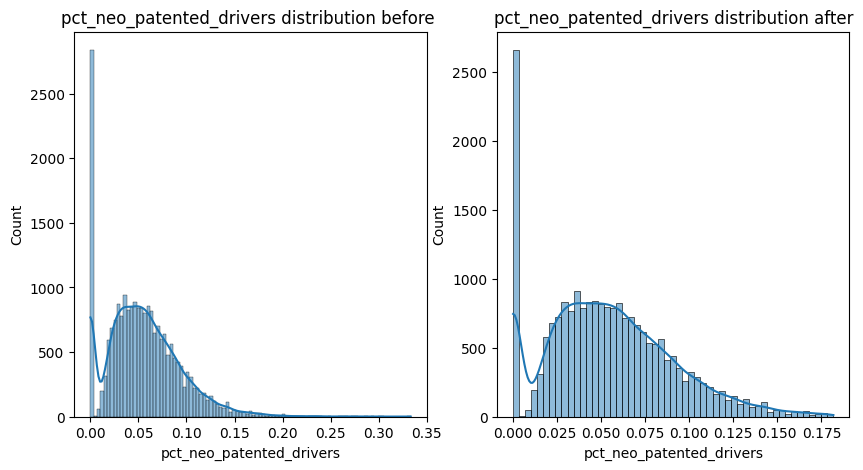

In [25]:
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} distribution before ')
    plt.subplot(1, 2, 2)
    sns.histplot(x=df_cleaned[feature],kde=True)
    plt.title(f'{feature} distribution after')
    plt.show()

In [ ]:
#save the cleaned dataset
df_cleaned.to_csv('../dataset/incident_profile_95_cleaned.csv', index=False)